# Tutorial 2: exercise

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial exercise was generated from an Jupyter notebook.  You can download the notebook [here](t2_exercise.ipynb). Use this downloaded Jupyter notebook to fill out your responses.*

### Exercise 1

The [Anderson-Fisher iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classic data set used in statistical and machine learning applications. Edgar Anderson carefully measured the lengths and widths of the petals and sepals of 50 irises in each of three species, *I. setosa*, *I. versicolor*, and *I. virginica*. Ronald Fisher then used this data set to distinguish the three species from each other.

**a)** Load the data set, which you can download [here](../data/anderson-fisher-iris.csv) into a Pandas `DataFrame` called `df`. Be sure to check out the structure of the data set before loading. You will need to use the `header=[0,1]` kwarg of `pd.read_csv()` to load the data set in properly.

In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting
import bebi103

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

/anaconda3/lib/python3.6/site-packages/bebi103/viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")


Loading BokehJS ...

In [2]:
# Use pd.read_csv() to load the data set
df = pd.read_csv('../data/anderson-fisher-iris.csv', header=[0,1], comment ='#')

**b)** Take a look `df`. Is it tidy? Why or why not?

In [3]:
# Look at the contents
df.head()

setosa                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               5.1              3.5               1.4              0.2   
1               4.9              3.0               1.4              0.2   
2               4.7              3.2               1.3              0.2   
3               4.6              3.1               1.5              0.2   
4               5.0              3.6               1.4              0.2   

         versicolor                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               7.0              3.2               4.7              1.4   
1               6.4              3.2               4.5              1.5   
2               6.9              3.1               4.9              1.5   
3               5.5              2.3               4.0              1.3   
4               6.5              2.8               4.6              1.5   

          virginica                                                      
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  
0               6.3              3.3               6.0              2.5  
1               5.8              2.7               5.1              1.9  
2               7.1              3.0               5.9              2.1  
3               6.3              2.9               5.6              1.8  
4               6.5              3.0               5.8              2.2

This data set is not tidy because every observation unit doesn't form a separate  

**c)** Perform the following operations to make a new `DataFrame` from the original one you loaded in exercise 1 to generate a new `DataFrame`. Do these operations one-by-one and explain what you are doing to the `DataFrame` in each one. The Pandas documentation might help.

In [4]:
df_tidy = df.stack(level=0)

In [5]:
df_tidy.head()

petal length (cm)  petal width (cm)  sepal length (cm)  \
0 setosa                    1.4               0.2                5.1   
  versicolor                4.7               1.4                7.0   
  virginica                 6.0               2.5                6.3   
1 setosa                    1.4               0.2                4.9   
  versicolor                4.5               1.5                6.4   

              sepal width (cm)  
0 setosa                   3.5  
  versicolor               3.2  
  virginica                3.3  
1 setosa                   3.0  
  versicolor               3.2

The stack command compresses a level into the dataframe's columns, in this case taking the level describing species and making it into a column.

In [6]:
df_tidy = df_tidy.sort_index(level=1)

In [7]:
df_tidy.head()

,,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


The sort_index command sorts the dataframe along one of the indices, in this case taking level 1, the species name, and sorting along that.

In [8]:
df_tidy = df_tidy.reset_index(level=1)

In [9]:
df_tidy.head()

,level_1,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


The reset_index command removes an index and adds it as a column, and names the new column level_1 by default.

In [10]:
df_tidy = df_tidy.rename(columns={'level_1': 'species'})

In [11]:
df_tidy.head()

,species,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


This command simply renames the column labeled level_1 by default to "species."

**d)** Is the resulting `DataFrame` tidy? Why or why not?

This DataFrame is tidy because it fulfills the requirements of tidy data, where each variable forms a column, each observation forms a row, and each type of observation unit forms a separate table. This table has one type of observational unit, and has each observation in a different row, with each variable as a different column. 

**e)** Using `df_tidy`, slice out all of the sepal lengths for I. versicolor as a Numpy array. 

In [12]:
species = df_tidy['species'] == 'versicolor'
df_tidy[['sepal length (cm)']].loc[species,:]

,sepal length (cm)
0,7.0
1,6.4
2,6.9
3,5.5
4,6.5
5,5.7
6,6.3
7,4.9
8,6.6
9,5.2


<br />

### Exercise 2

**a)** Make a scatter plot of sepal width versus petal length with the glyphs colored by species.

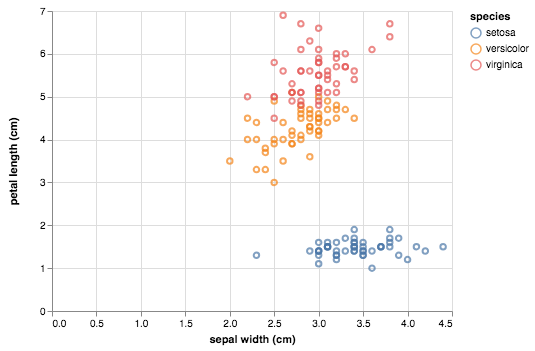

In [13]:
alt.Chart(df_tidy
    ).mark_point(
    ).encode(
        x = 'sepal width (cm)',
        y = 'petal length (cm)',
        color=alt.Color('species', title = 'species')
    ).interactive()

**b)** Make a plot comparing the petal widths of the respective species. Comment on why you chose the plot you chose.

In [19]:
altcat.catplot(data=df_tidy,
               encoding=dict(x=alt.X('species', title=None),
                             y='petal width (cm)',
                             color=alt.Color('species', legend=None)),
               transform = 'box'
              ).configure_bar(
                    fillOpacity=0.75
              ).configure_axisX(
                  labelAngle=0,
              )

TypeError: 'in <string>' requires string as left operand, not type

I would like to make a box-and-whisker plot to summarize the data and compare the petal width across species, as this plot would show the range of the data in each species while also allowing us to easily compare the data between species. Unfortunately I'm running into a strange error that I don't know how to deal with, where the function calls for transform to be set as a string, but returns an error if transform is set as a string. I thought I might be able to solve this error by reinstalling anaconda with the newer version, but reinstalling all the packages is taking longer than anticipated.